In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
# Step 2: Data Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

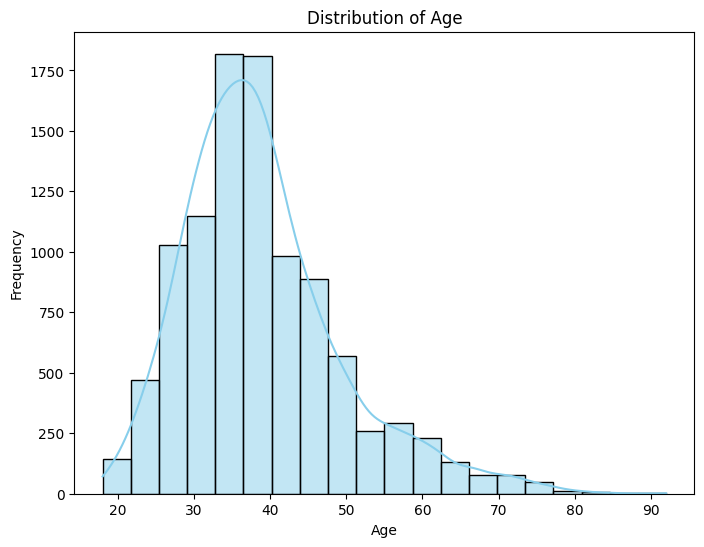

In [17]:
# Visualizations
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\deepr\AppData\Local\Temp\ipykernel_23648\3617301433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='pastel')


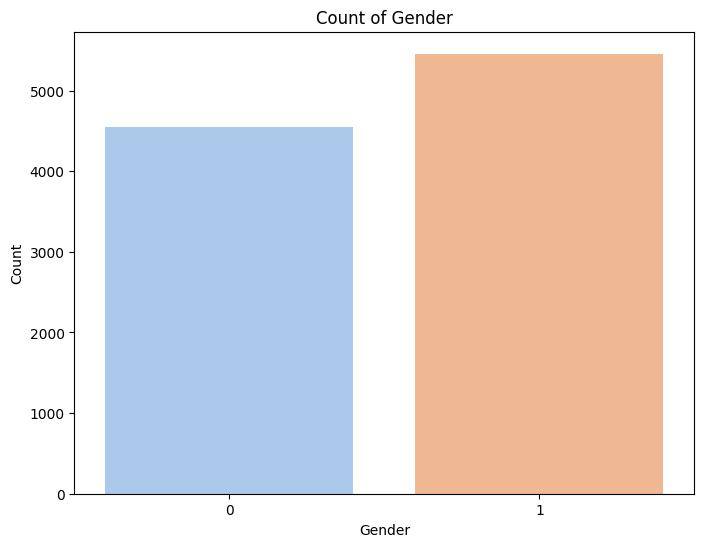

In [18]:
# Count of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', palette='pastel')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\deepr\AppData\Local\Temp\ipykernel_23648\1763808207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Geography', y='CreditScore', palette='Set2')


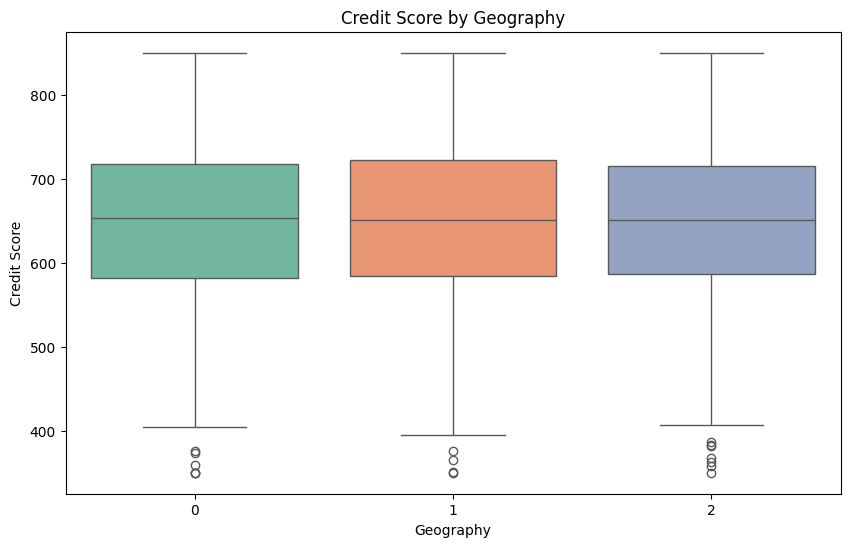

In [19]:
# Box plot of CreditScore by Geography
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Geography', y='CreditScore', palette='Set2')
plt.title('Credit Score by Geography')
plt.xlabel('Geography')
plt.ylabel('Credit Score')
plt.show()

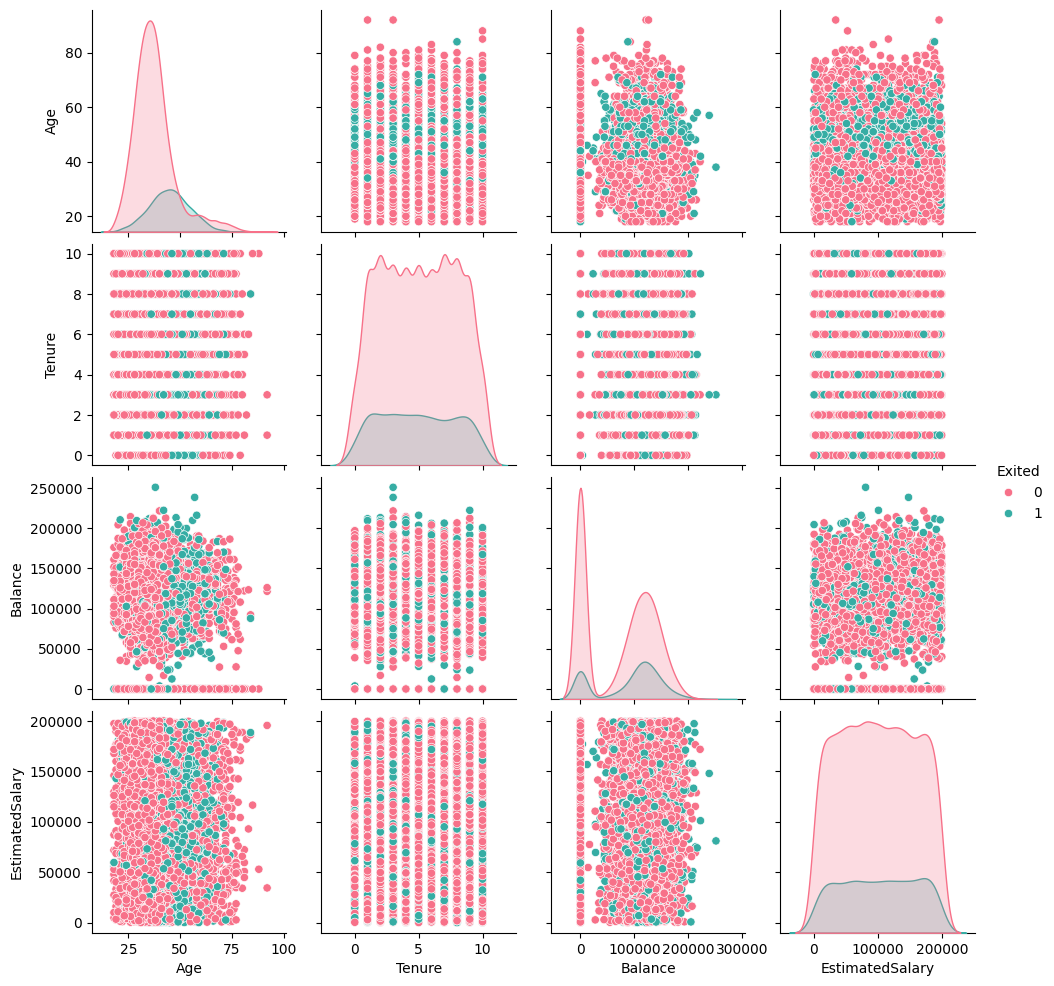

In [20]:
# Pairplot for multiple numerical variables
sns.pairplot(data[['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited', palette='husl')
plt.show()

In [5]:
# Splitting into features (X) and target variable (y)
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

In [6]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Model Selection
# Initialize models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [8]:
# Step 5: Model Training
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

c:\Users\deepr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [9]:
# Step 6: Model Evaluation
# Logistic Regression
lr_pred = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.799
Logistic Regression Confusion Matrix:
 [[1567   40]
 [ 362   31]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.44      0.08      0.13       393

    accuracy                           0.80      2000
   macro avg       0.62      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



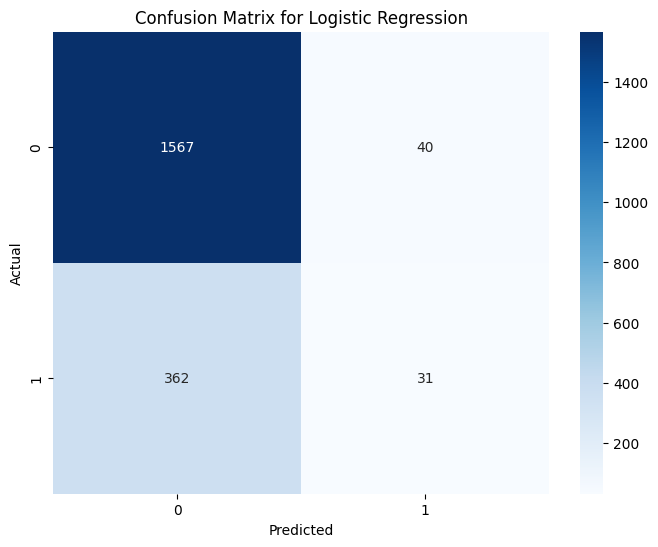

In [29]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
# Random Forest
rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))



Random Forest Accuracy: 0.8675
Random Forest Confusion Matrix:
 [[1553   54]
 [ 211  182]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



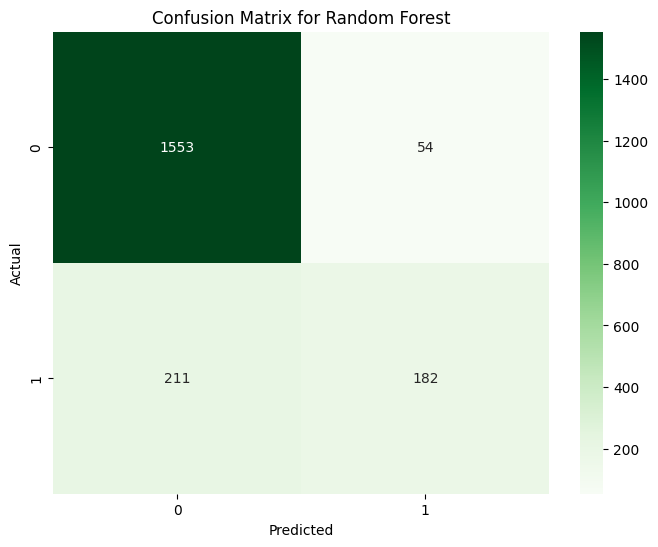

In [28]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [11]:
# Gradient Boosting
gb_pred = gradient_boosting.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("\nGradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))



Gradient Boosting Accuracy: 0.866
Gradient Boosting Confusion Matrix:
 [[1547   60]
 [ 208  185]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



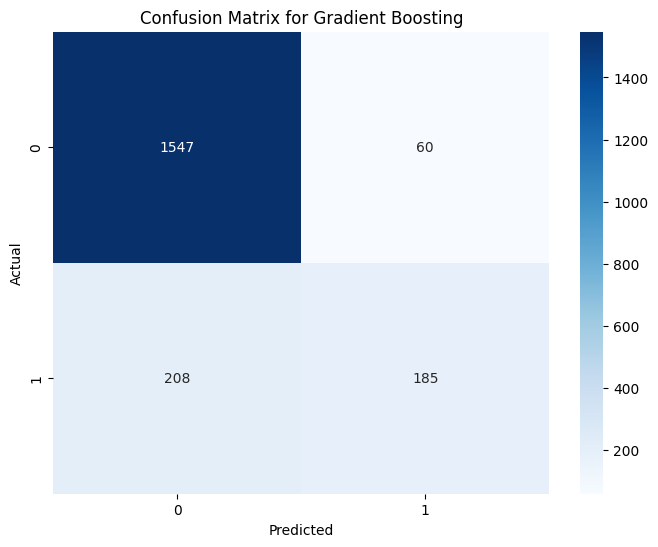

In [27]:
# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


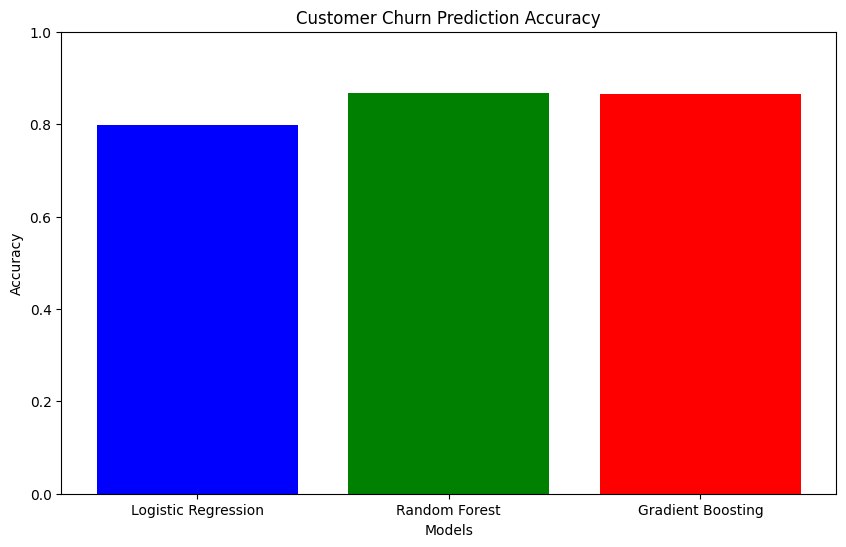

In [13]:
# Step 9: Visualization
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [lr_accuracy, rf_accuracy, gb_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Customer Churn Prediction Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.show()

In [24]:
import joblib

# Save Logistic Regression model
joblib.dump(logistic_regression, 'logistic_regression_model.h5')


['logistic_regression_model.h5']

In [25]:
# Save Random Forest model
joblib.dump(random_forest, 'random_forest_model.h5')


['random_forest_model.h5']

In [26]:
# Save Gradient Boosting model
joblib.dump(gradient_boosting, 'gradient_boosting_model.h5')

['gradient_boosting_model.h5']